# Iris Data EDA(Exploratory data analysis)

## 목차 
1. [문제정의](#1)
    1. 목표
2. [데이터 수집 및 소개](#2)
    1. 수집
    2. 소개
3. [데이터 전처리](#3)
4. [탐색적 데이터 분석](#4)

<a id= '1' ></a>
## 1. 문제정의 

**목표 **  
종류가 다른 3가지 붓꽃(setosa, versicolor, virginica) 꽃받침, 꽃잎의 길이에 따라 구분할 수 있을까?  

---

<a id='2'></a>

## 2. 데이터 수집 및 소개 

**수집**
    - 연구용으로 공개된 자료이다. 자세한 사항은 아래 링크를 참조하자.
    - 작성자 : RA Fisher
    - 기부자 : Michael Marshall (MARSHALL % PLU '@' io.arc.nasa.gov )
    - 출처 :  https://archive.ics.uci.edu/ml/datasets/Iris

**소개**

속성정보

1. sepal length in cm (꽃받침 길이)
2. sepal width in cm  (꽃받침 너비)
3. petal length in cm (꽃잎 길이)
4. petal width in cm  (꽃잎 너비)
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

---

<a id='3'></a>
## 3. 데이터 전처리

### import 패키지

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# sns.set(style="white", color_codes=True)

### 데이터 로드

In [2]:
iris = pd.read_csv("./input/Iris.csv") # pa.read_csv로 파일 읽어오기 , header 존재

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# 데이터별 요약통계량을 살펴 보자.
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# 각 종 별 개수 50개 동일
iris["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

데이터의 결측치 존재하지 않다. 매우 깔끔한 데이터인 것을 확인할 수 있다.

실제 업무 데이터와 연구용 데이터는 많은 차이가 있다.  
이렇게 깔끔하게 정리된 데이터는 찾아보기 어려우며.. 분석 업무의 1/3 이상 데이터 전처리에 사용한다.

<a id='4'></a>
## 4. 탐색적 데이터 분석

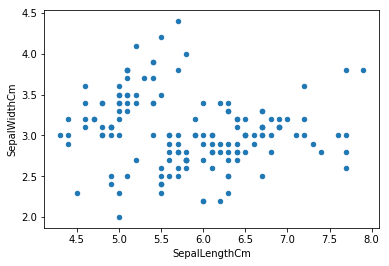

In [6]:
# 꽃받침 길이,너비 x,y 그래프
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

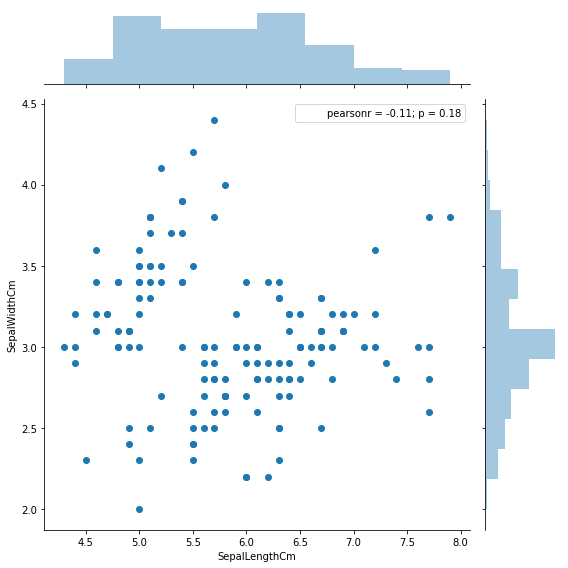

In [7]:
# 위와 같은 그래프이지만 데이터 분포까지 확인할 수 있다.
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=8)

In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


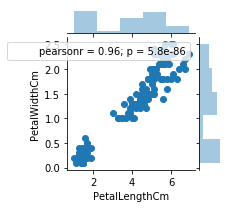

In [11]:
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm', data=iris, size=3)

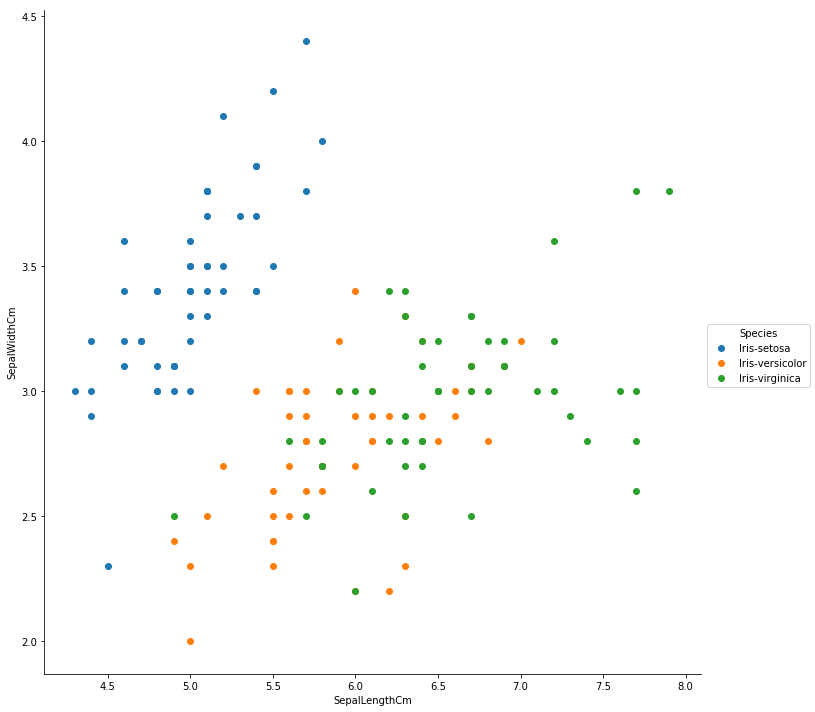

In [12]:
sns.FacetGrid(iris, hue="Species", size=10) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

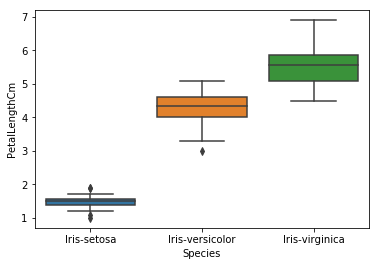

In [13]:
#종 별 꽃잎 길이 박스플롯 -> 무조건 하나!
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

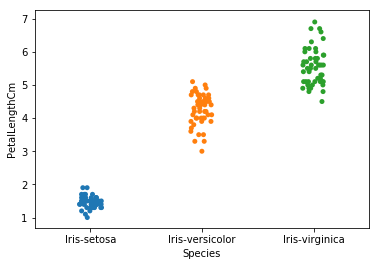

In [18]:
# 두 그래프 합쳐서 보여준다.
#ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

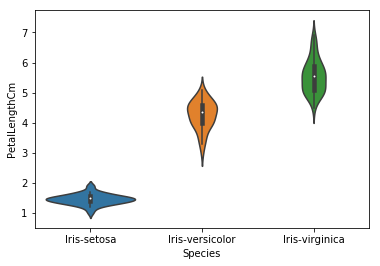

In [19]:
# 바이올린 플롯으로 확인해보자.
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

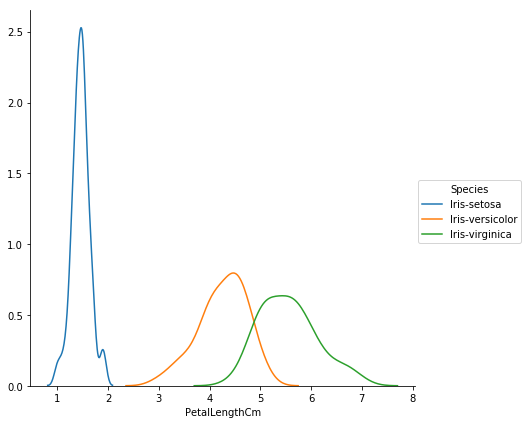

In [20]:
sns.FacetGrid(iris, hue="Species", size=6).map(sns.kdeplot, "PetalLengthCm").add_legend()

In [24]:
iris.drop('Id',axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


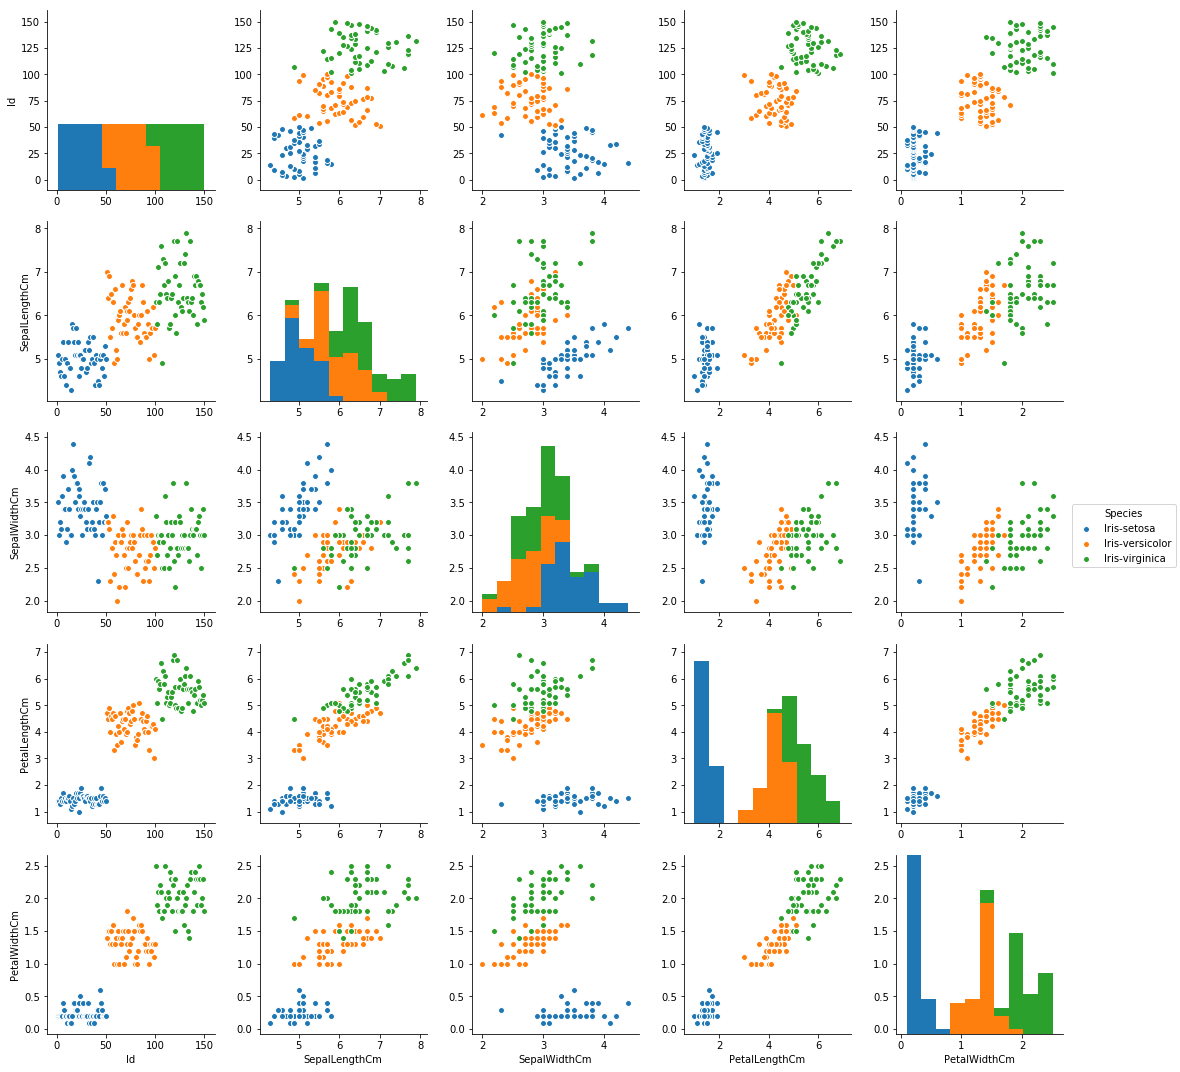

In [26]:
sns.pairplot(iris, hue="Species", size=3)

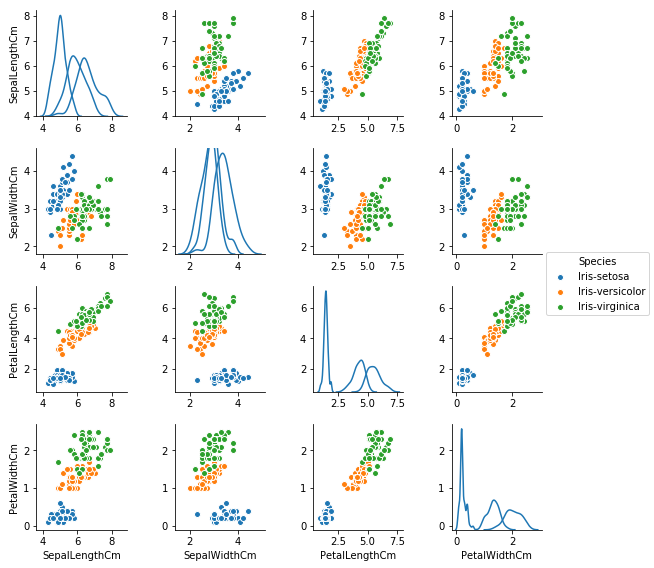

In [22]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=2, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000136BBF60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013C9B3C8>]], dtype=object)

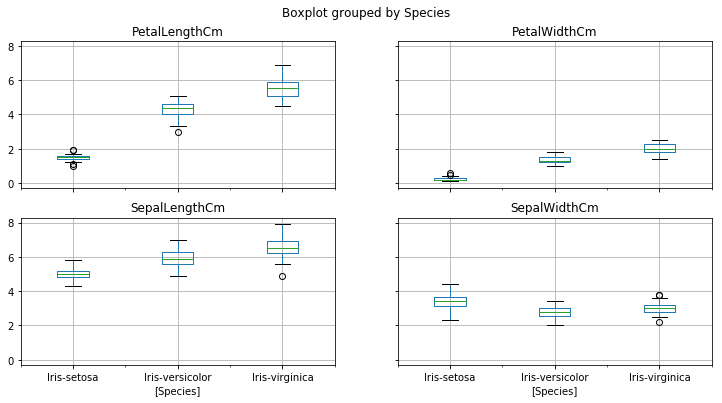

In [27]:
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

## 연습

In [31]:
iris = pd.read_csv("./input/Iris.csv") # pa.read_csv로 파일 읽어오기 , header 존재

In [35]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
import seaborn as sns

In [33]:
sns.set()

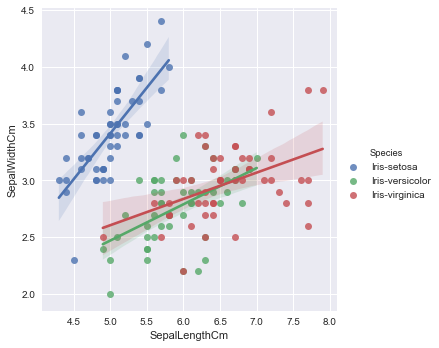

In [36]:
g = sns.lmplot(x="SepalLengthCm", y = "SepalWidthCm", hue = "Species",
              truncate = True, size = 5, data = iris)